# Problem 1: Data from yfinance

Importing the [yfinance](https://github.com/ranaroussi/yfinance) package.

In [40]:
# Import yfinance library.
import yfinance as yf

# https://docs.python.org/3/library/datetime.html#examples-of-usage-date
# Date and times.
import datetime as dt

# Data frames.
import pandas as pd

# Plotting.
import matplotlib.pyplot as plt

# Listing files in a folder.
import os

Getting each data in variables.

In [41]:
# yf.download('META', 'AAPL', 'AMZN', 'NFLX', 'GOOG', period='5d')
#meta_data = yf.download('META', period='5d')
# apple_data = yf.download('AAPL', period='5d')
# amazon_data = yf.download('AMZN', period='5d')
# netflix = yf.download('NFLX', period='5d')
# google_data = yf.download('GOOG', period='5d')

# Using `download` method to get data for 5 days period
# https://ranaroussi.github.io/yfinance/reference/api/yfinance.download.html#yfinance-download
df = yf.download(['META', 'AAPL', 'AMZN', 'NFLX', 'GOOG'], period='5d')

/tmp/ipykernel_3015/2334644856.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(['META', 'AAPL', 'AMZN', 'NFLX', 'GOOG'], period='5d')
[*********************100%***********************]  5 of 5 completed
[*********************100%***********************]  5 of 5 completed


In [42]:
print(df)

Price            Close                                                  \
Ticker            AAPL        AMZN        GOOG        META        NFLX   
Date                                                                     
2025-11-19  268.559998  222.690002  292.989990  590.320007  110.000000   
2025-11-20  266.250000  217.139999  289.980011  589.150024  105.669998   
2025-11-21  271.489990  220.690002  299.649994  594.250000  104.309998   
2025-11-24  275.920013  226.279999  318.470001  613.049988  106.970001   
2025-11-25  277.931000  229.679993  323.049988  636.159973  104.224998   

Price             High                                                  ...  \
Ticker            AAPL        AMZN        GOOG        META        NFLX  ...   
Date                                                                    ...   
2025-11-19  272.209991  223.740005  304.250000  595.330017  113.339996  ...   
2025-11-20  275.429993  227.410004  306.890015  606.719971  111.099998  ...   
2025-11-21  

In [43]:
#df.to_csv('data/data.csv')

In [44]:
# Current date and time
now = dt.datetime.now()

# Show.
now

datetime.datetime(2025, 11, 25, 20, 50, 43, 638143)

In [45]:
# Format: YYYYMMDD-HHMMSS
now.strftime("%Y%m%d-%H%M%S")

'20251125-205043'

In [46]:
# Create file name with timestamp
file_name = now.strftime("%Y%m%d-%H%M%S") + ".csv"

print(file_name)

20251125-205043.csv


In [47]:
# Save with timestamped filename
df.to_csv("data/" + now.strftime("%Y%m%d-%H%M%S") + ".csv")

# Problem 2: Plotting Data

In [48]:
def plot_data():
    df[[( 'Close','META' ),( 'Close','AAPL' ),( 'Close','AMZN' ),( 'Close','NFLX' ),( 'Close','GOOG' )]].plot()

20251125-205043.csv


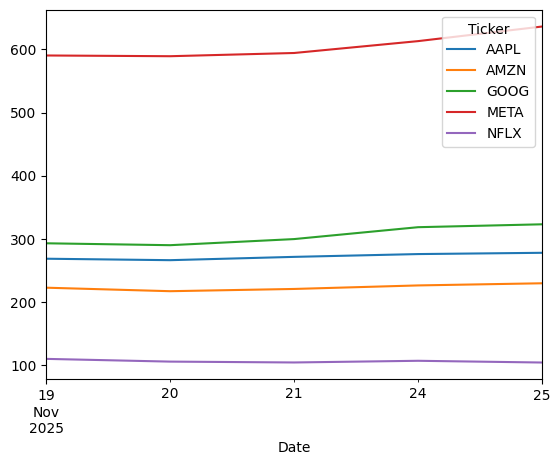

In [51]:
# Plot new figure and axis.
fig, ax = plt.subplots()

# Plot five stocks
df['Close'].plot(ax=ax)

path = 'plots/'
png_file_name = now.strftime("%Y%m%d-%H%M%S") + ".png"
full_file_name = path + png_file_name


# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.savefig.html#matplotlib-pyplot-savefig
fig.savefig(full_file_name, dpi=300)

# List files in the data folder
data_files = os.listdir('data/')

# Sort files
sorted_data_files = sorted(data_files, reverse=True)
print(sorted_data_files[0])
